#### Imports

In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

%matplotlib inline

#### Import Data

In [11]:
with np.load("notMNIST.npz") as data:
    images, labels = data["images"], data["labels"]

In [80]:
num_classes = labels.max() - labels.min() + 1
num_classes

10

In [12]:
images.shape

(28, 28, 18720)

In [18]:
images.T.shape

(18720, 28, 28)

In [13]:
labels.shape

(18720, 1)

In [34]:
temp_img = images.T[1].T
temp_img.shape

(28, 28)

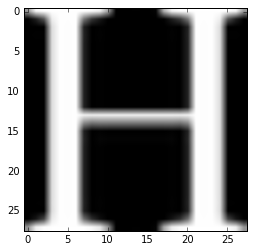

In [35]:
plt.imshow(temp_img, cmap=plt.gray())

In [52]:
print labels[1]

[7]


## Logistic Regression w/ Softmax

- Softmax output layer
- Log likelihood objective function
- Train with no reg., SGD and momentum
- Find good value for momentum hyper
- Plot log likelihood / errors of training and valid vs number of epochs
- Determine best time to stop training, and compute test errors on it

$$y(\mathbf{x}, \mathbf{w}) = \sigma (\mathbf{x}^T \mathbf{w} + b)$$

#### Set up data

In [37]:
images_re = images.reshape((images.shape[0] * images.shape[1], images.shape[2])).T
images_re.shape

(18720, 784)

In [39]:
training_size = 15000
validation_size = 1000

In [76]:
train_x = images_re[:training_size]
valid_x = images_re[training_size:training_size + validation_size]
test_x = images_re[training_size + validation_size:]

#### Create one-hot labels

In [68]:
labels.size

18720

In [69]:
labels[:10]

array([[4],
       [7],
       [5],
       [9],
       [9],
       [1],
       [0],
       [8],
       [5],
       [5]], dtype=uint8)

In [74]:
num_examples = labels.size
labels_one_hot = np.zeros((num_examples, labels.max() - labels.min() + 1))
labels_one_hot[np.arange(num_examples), labels[:num_examples].ravel()] = 1

In [75]:
labels_one_hot[:10]

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [77]:
train_y = labels_one_hot[:training_size]
valid_y = labels_one_hot[training_size:training_size + validation_size]
test_y = labels_one_hot[training_size + validation_size:]

#### Set up TF variables

In [87]:
#Placeholders
X = tf.placeholder("float", shape=(None, 28 * 28))
#Y = tf.placeholder("float", shape=(None, num_classes))
Targets = tf.placeholder("float", shape=(None, num_classes))

#Variables
W = tf.Variable(np.random.randn(28 * 28, num_classes).astype("float32"), name="weight")
b = tf.Variable(np.random.randn(num_classes).astype("float32"), name="bias")

In [88]:
logits = tf.add(tf.matmul(X, W), b)
Y = tf.nn.softmax(logits)

#### Try with CE loss function

In [89]:
cross_entropy = -tf.reduce_sum(Targets * tf.log(Y))

In [90]:
learning_rate = 0.01
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [91]:
init = tf.initialize_all_variables()

In [92]:
sess = tf.Session()
sess.run(init)

In [93]:
num_epochs = 100
mini_batch_size = 100

In [94]:
train_error = []
valid_error = []

In [95]:
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Targets,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float32"))

In [96]:
for i in range(num_epochs): 
    sess.run(train_step, feed_dict={X: train_x, Targets: train_y})
    train_error.append(sess.run(accuracy, feed_dict={X: train_x, Targets: train_y}))
    valid_error.append(sess.run(accuracy, feed_dict={X: valid_x, Targets: valid_y}))

In [97]:
print(sess.run(accuracy, feed_dict={X: test_x, Targets: test_y}))

0.100735


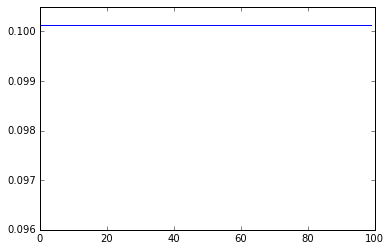

In [101]:
plt.plot(np.arange(100), train_error)
plt.plot(np.arange(100), valid_error)